In [1]:
import numpy as np
from astropy.io import ascii
from heapy.temporal.lag import Lag

In [2]:
LC = ascii.read('./lc.txt')
time = LC['time']
rate = LC['rate']
bak = LC['bak']
bak_se = LC['bak_se']

dt = time[1] - time[0]
print('dt', dt)

dt 0.5


In [3]:
xcts = rate[2:] * dt
xbcts = bak[2:] * dt
xbcts_se = bak_se[2:] * dt

ycts = rate[:-2] * dt
ybcts = bak[:-2] * dt
ybcts_se = bak_se[:-2] * dt


+-----------------------------------------------+
 lag (s)        lag_le (s)     lag_he (s)     
 1.0000         0.0022         0.0024         
+-----------------------------------------------+

+-----------------------------------------------+
 plotting tau_ccf.pdf
+-----------------------------------------------+



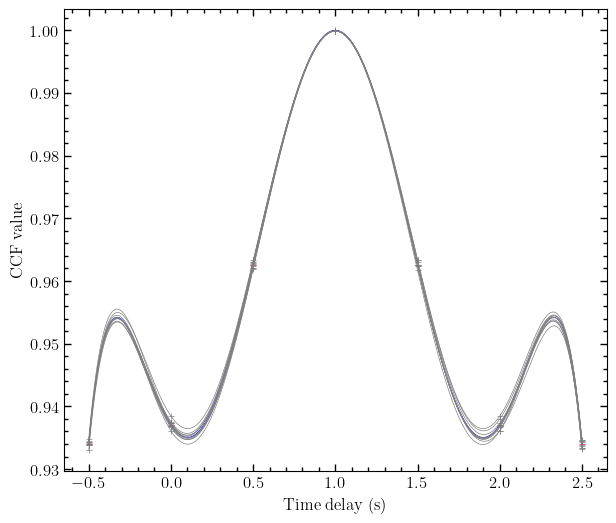

+-----------------------------------------------+
 plotting lag_pdf.pdf
+-----------------------------------------------+



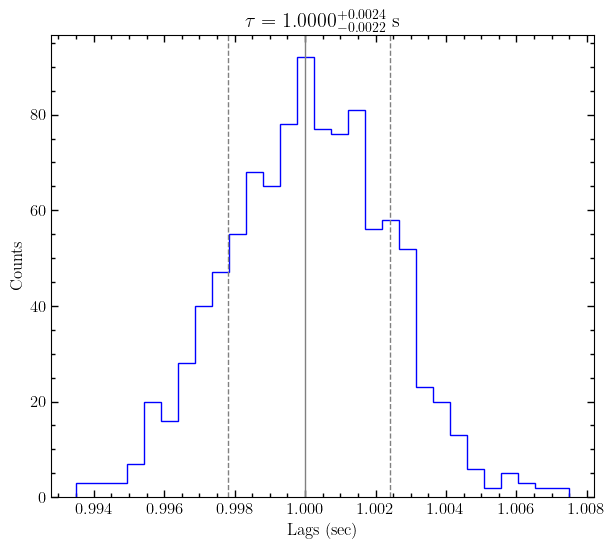

In [4]:
lag = Lag(xcts, 
          ycts, 
          xbcts, 
          ybcts, 
          dt, 
          xtype='pg', 
          ytype='pg', 
          xbcts_se=xbcts_se, 
          ybcts_se=ybcts_se)
lag.mc_simulation(nmc=1000)
lag.callag(width=3, deg=6)
lag.savedata('./lag')
lag.savefig('./lag', show=True)